In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMG_SIZE = 224
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

In [4]:
train_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Montgomery CXR Dataset/aug-data/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    interpolation="bilinear",
    follow_links=False,
)

dev_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Montgomery CXR Dataset/origin-data/validation/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    interpolation="bilinear",
    follow_links=False,
)

test_set = test_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Montgomery CXR Dataset/origin-data/test/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 616 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Found 28 files belonging to 2 classes.


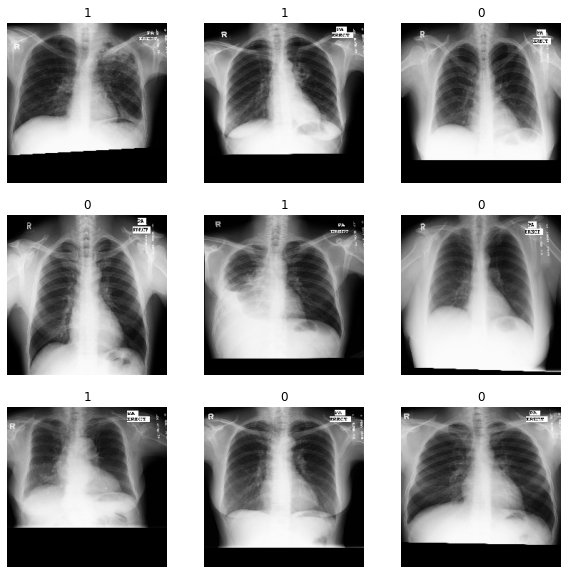

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dev_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
!pip install livelossplot

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

monitor_val_acc = EarlyStopping(monitor = 'val_loss', 
                                patience = 5)

In [8]:
# MobileNetV3 
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications.efficientnet import EfficientNetB7

efficientnet = EfficientNetB7(include_top=False, input_shape=(224, 224, 3))

# breeze all VGG previous layers
for layer in efficientnet.layers:
	layer.trainable = False

flatten = Flatten()(efficientnet.layers[-1].output)
fc1 = Dense(128, activation='relu')(flatten)
out = Dense(1, activation='sigmoid')(fc1)

model = Model(inputs=efficientnet.inputs, outputs=out)
model.summary()

258088960/258076736 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding

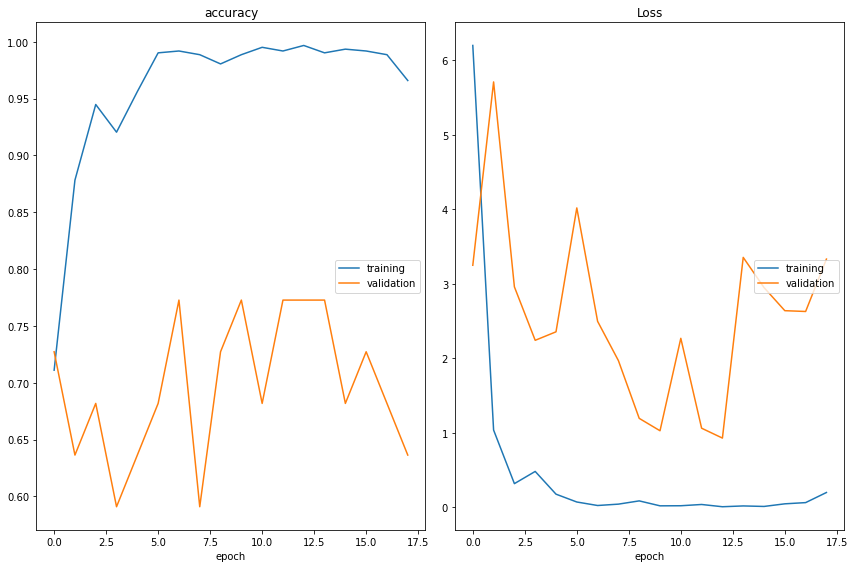

accuracy
	training         	 (min:    0.711, max:    0.997, cur:    0.966)
	validation       	 (min:    0.591, max:    0.773, cur:    0.636)
Loss
	training         	 (min:    0.007, max:    6.200, cur:    0.198)
	validation       	 (min:    0.929, max:    5.711, cur:    3.332)
20/20 [==============================] - 87s 3s/step - loss: 0.1984 - accuracy: 0.9659 - val_loss: 3.3323 - val_accuracy: 0.6364


In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_set, 
           epochs = 200,
           batch_size=1024,
           callbacks=[PlotLossesKeras(), monitor_val_acc],
           validation_data = dev_set)

In [10]:
model.save('/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for Montgomery/model_efficient.h5')